# Uniform Manifold Approximation and Projection (UMAP)

In [1]:
# ! pip install umap-learn

In [2]:
# ## plotting functionality
# ! pip install umap-learn[plot] 

In [3]:
# hvppi_preds = pd.read_csv('cleaned_edgelist.csv').drop(columns=['Interaction'])
# hvppi_preds['Segment'] = hvppi_preds['Segment'].fillna('NA')
# hvppi_preds

In [4]:
# ## Filter Scores
# pos_df = hvppi_preds[hvppi_preds['Score'] >= 0.143]
# pos_df = pos_df.sort_values(by=['Score'], ascending=False).reset_index(drop=True)
# # pos_df

# # pos_deg_counts = pos_df['Pro1ID'].value_counts().rename_axis('Pro1ID').reset_index(name='value_counts')
# # pos_deg_counts

# neg_df = hvppi_preds[hvppi_preds['Score'] < 0.143].reset_index(drop=True)
# neg_df['Pro1ID'].value_counts()
# # neg_df

In [5]:
# hadamard_edges = hvppi_preds[['Pro1ID', 'Pro2ID', 'Score']].sort_values(by=['Score'], ascending=False).reset_index(drop=True)
# hadamard_edges.columns = ['Protein1_ID', 'Protein2_ID', 'Score']
# hadamard_edges = hadamard_edges[hadamard_edges['Score']!=0.000]
# # hadamard_edges

# ## Map to index
# h_edges_idx = pd.merge(hadamard_edges, protein_list, on=['Protein1_ID'])
# h_edges_idx = pd.merge(h_edges_idx, protein_list, left_on=['Protein2_ID'], right_on=['Protein1_ID'])
# h_edges_idx = h_edges_idx[['Unnamed: 0_x', 'Unnamed: 0_y', 'Score']]
# h_edges_idx.columns = ['Protein1_ID', 'Protein2_ID', 'Score']
# h_edges_idx

In [6]:
# import sklearn.datasets
import pandas as pd
import numpy as np

# import scipy.sparse as sp
from scipy import sparse

import umap
import umap.plot

### 2 classes: IAV (Index 0 to 40) & Human (Index 41 to 15684)

In [7]:
protein_list = pd.read_csv('protein_class.csv') 
protein_list

,Unnamed: 0,Protein1_ID,class
0,0,P03428,IAV
1,1,P03431,IAV
2,2,P03433,IAV
3,3,P03452,IAV
4,4,P03466,IAV
...,...,...,...
15680,15680,Q6NUS8,Human
15681,15681,P12018,Human
15682,15682,Q96IU2,Human
15683,15683,Q6PEW1,Human


In [8]:
# target = protein_list['class'].values
# target

# Node Embeddings

## Graph Embeddings

In [9]:
# emb_name = 'node2vec_plus/SparseOTF'
# edit_data_path = 'Embeddings/Graph/' + emb_name + '/' 

In [10]:
'''
    Methods list:
    
    deepwalk_nw16_wl32
    node2vec_nw8_wl32_p0.25_q0.5
    struc2vec_nw128_wl16
    
    LINE_epochs35
    LINE_order1_epochs10, LINE_order2_epochs20
    
    sdne_a0_b10
    grarep_k2
    vae_h256_128
    ripple2vec_nw8_wl8
    
    n2vplus_nw8_wl32_p0.25_q0.5 .emb ## For comparison with node2vec
    n2v_plus_p4_q0.5 .txt  ## Best hyper-param
'''

'\n    Methods list:\n    \n    deepwalk_nw16_wl32\n    node2vec_nw8_wl32_p0.25_q0.5\n    struc2vec_nw128_wl16\n    \n    LINE_epochs35\n    LINE_order1_epochs10, LINE_order2_epochs20\n    \n    sdne_a0_b10\n    grarep_k2\n    vae_h256_128\n    ripple2vec_nw8_wl8\n    \n    n2vplus_nw8_wl32_p0.25_q0.5 .emb ## For comparison with node2vec\n    n2v_plus_p4_q0.5 .txt  ## Best hyper-param\n'

In [11]:
# # Best
hyper_param = 'vae_h256_128'
edit_data_path = 'Embeddings/Graph/Best/Nov_2022/' 

In [12]:
# # Worst
# hyper_param = 'epochs_50' 
# edit_data_path = 'Embeddings/Graph/Worst/' 

In [13]:
## deepwalk, node2vec, struc2vec, LINE
# emb = pd.read_csv(edit_data_path + hyper_param + '.csv', skiprows=1, header = None)

## SDNE, GraRep, VAE, ripple2vec, node2vec+
emb = pd.read_csv(edit_data_path + hyper_param + '.txt', sep=' ', skiprows=1, header = None)

## node2vec+ 
# emb = pd.read_csv(edit_data_path + hyper_param + '.emb', sep=' ', skiprows=1, header = None)
 
emb_f = emb.sort_values(by=[0]).set_index([0])
emb_f

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,,,,,,,,,,,,,,,,,,,,,
0,0.540764,-0.074471,0.383962,-0.097833,-0.031337,4.103184,-0.150652,0.324719,0.277000,0.477717,...,-0.477993,0.307477,6.643920,-0.519499,3.874137,0.534100,-11.072546,-0.173125,-12.428924,-1.379751
1,0.540793,-0.074484,0.383904,-0.097869,-0.031338,4.102888,-0.150634,0.324775,0.277009,0.477732,...,-0.477988,0.307457,6.643532,-0.519509,3.873851,0.534076,-11.071804,-0.173140,-12.428087,-1.379685
2,0.540751,-0.074479,0.383908,-0.097840,-0.031321,4.102774,-0.150611,0.324749,0.277002,0.477723,...,-0.477981,0.307489,6.643270,-0.519513,3.873726,0.534066,-11.071448,-0.173123,-12.427685,-1.379560
3,0.540848,-0.074434,0.383915,-0.097807,-0.031223,4.102927,-0.150636,0.324706,0.276876,0.477570,...,-0.478071,0.307481,6.643401,-0.519436,3.873921,0.534128,-11.071972,-0.173212,-12.428182,-1.379722
4,0.540764,-0.074471,0.383962,-0.097833,-0.031337,4.103184,-0.150652,0.324719,0.277000,0.477717,...,-0.477993,0.307477,6.643920,-0.519499,3.874137,0.534099,-11.072546,-0.173125,-12.428924,-1.379751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15680,0.002448,-0.006539,0.011832,-0.013023,0.001305,0.016057,-0.007629,0.000014,-0.006263,-0.014003,...,-0.002519,0.005173,0.033190,0.006583,0.026131,-0.007516,-0.059987,-0.002148,-0.067686,-0.009365
15681,0.001875,-0.005003,0.012369,-0.013823,0.000918,0.008881,-0.007676,-0.000834,-0.007968,-0.014915,...,-0.002360,0.004136,0.022122,0.007336,0.019988,-0.008397,-0.042264,-0.000949,-0.047630,-0.006276
15682,0.004357,-0.005840,0.012872,-0.015210,0.002007,0.013157,-0.007716,-0.000183,-0.007602,-0.015056,...,-0.003914,0.005561,0.028960,0.007058,0.024362,-0.007782,-0.055039,-0.001124,-0.061892,-0.007542


In [14]:
g_features = emb_f.sort_index().values
print(g_features.shape)
print(g_features)

(15685, 128)
[[ 5.4076420e-01 -7.4470680e-02  3.8396215e-01 ... -1.7312527e-01
  -1.2428924e+01 -1.3797512e+00]
 [ 5.4079280e-01 -7.4483700e-02  3.8390420e-01 ... -1.7314035e-01
  -1.2428087e+01 -1.3796847e+00]
 [ 5.4075116e-01 -7.4479160e-02  3.8390810e-01 ... -1.7312340e-01
  -1.2427685e+01 -1.3795596e+00]
 ...
 [ 4.3571293e-03 -5.8396314e-03  1.2872243e-02 ... -1.1244385e-03
  -6.1892062e-02 -7.5421077e-03]
 [ 3.8400188e-03 -6.4454456e-03  1.1123202e-02 ... -2.2174837e-03
  -6.8401880e-02 -9.3829790e-03]
 [ 2.8160654e-03 -5.5179300e-03  1.1777018e-02 ... -2.9390742e-04
  -4.8068404e-02 -6.2877090e-03]]


## Protein Embeddings 

In [15]:
# emb_name = 'CTD'

In [16]:
# edit_data_path = 'Embeddings/Protein/' + emb_name 

# ## Load npz
# read_emb = sparse.load_npz(edit_data_path + '.npz')
# p_features = read_emb.toarray()

# print(p_features.shape)
# print(p_features)

# mapper = umap.UMAP().fit(p_features)
# umap.plot.points(mapper, labels=target)

# Edge Embeddings

In [17]:
'''
    Group human proteins into classes - according to HVPPI interaction potential thresholds
    
    (A) 0.143 <= Score < 0.212 (0.90)
    (B) 0.212 <= Score < 0.375 (0.95)
    (C) Score >= 0.375 (0.99)
    (D) Score < 0.143
    
    Pro1ID --- Human
    Pro2ID --- IAV
'''

'\n    Group human proteins into classes - according to HVPPI interaction potential thresholds\n    \n    (A) 0.143 <= Score < 0.212 (0.90)\n    (B) 0.212 <= Score < 0.375 (0.95)\n    (C) Score >= 0.375 (0.99)\n    (D) Score < 0.143\n    \n    Pro1ID --- Human\n    Pro2ID --- IAV\n'

In [18]:
## Get edge embeddings from node embeddings

def generate_edge_emb(input_df, input_feat):
    
    edges_count = input_df.shape[0]

    X = np.empty((edges_count, input_feat.shape[1])) ## All embeddings
    k = 0

    for i in range(len(input_df)):

#         print(input_df['Protein1_ID'][i], input_df['Protein2_ID'][i])

        u = input_feat[input_df['Protein1_ID'][i]]
        v = input_feat[input_df['Protein2_ID'][i]]

        hadamard = np.multiply(u, v)

        X[k] = hadamard
        k = k + 1

    print(X)
    print(X.shape)
    
    ## Target
    target = input_df['Class'].values
#     print(target)
    
    return X, target

In [19]:
# ## ALL EDGES

# edge_emb = pd.read_csv('./hvppi_edgelist_idx.csv')
# edge_emb

# print(edge_emb['Class'].value_counts())
# print("============================================================")

In [20]:
# Plot only classes A, B and C
# edge_emb_f = edge_emb[edge_emb['Class'] != 'D']
# edge_emb_f

# class_C_df = edge_emb_f[edge_emb_f['Class']=='C']
# print(class_C_df['Score'].min(), class_C_df['Score'].max())

# class_B_df = edge_emb_f[edge_emb_f['Class']=='B']
# print(class_B_df['Score'].min(), class_B_df['Score'].max())

# class_A_df = edge_emb_f[edge_emb_f['Class']=='A']
# print(class_A_df['Score'].min(), class_A_df['Score'].max())

In [21]:
# # Add class label
# # edge_emb['Class'] = ''

# edge_emb.loc[(edge_emb['Score'] >= 0.143) & (edge_emb['Score'] < 0.212), 'Class'] = 'A'
# edge_emb.loc[(edge_emb['Score'] >= 0.212) & (edge_emb['Score'] < 0.375), 'Class'] = 'B'
# edge_emb.loc[edge_emb['Score'] >= 0.375, 'Class'] = 'C'
# edge_emb.loc[edge_emb['Score'] < 0.143, 'Class'] = 'D'

# edge_emb

# # edge_emb.to_csv('./hvppi_edgelist_idx.csv', index=False)

In [22]:
## TRAIN/TEST EDGES

# edge_emb_f = pd.read_csv('umap_train_test_dataset.csv') 
# edge_emb_f = pd.read_csv('umap_train_test_dataset_2.csv') ## 2 classes

# edge_emb_f

In [23]:
# edge_emb_f = pd.read_csv('umap_expt_test.csv') ## Experimentally Verified

In [24]:
# ## TEST (Actual VS Predicted)

# edge_emb = pd.read_csv('umap_train_test_dataset.csv') 
# # edge_emb

# edge_emb_f = edge_emb[(edge_emb['Class'] == 'test_pos') | (edge_emb['Class'] == 'test_neg')].reset_index(drop=True)
# # edge_emb_f

# ## Read predictions
# FNN_pred = pd.read_csv('Eval_Results/umap_plot_preds/VAE.csv') ## Choose dataframe!!!!!
# FNN_pred = FNN_pred[['Protein1_ID', 'Protein2_ID', 'Class_4']] ## Choose class!!!!!
# FNN_pred.columns = ['Protein1_ID', 'Protein2_ID', 'Class']

# ## Plot only FN and FP 
# FNN_pred_f = FNN_pred[(FNN_pred['Class'] == 'FN') | (FNN_pred['Class'] == 'FP')]

# ## Concat
# edge_emb_f = pd.concat([edge_emb_f, FNN_pred_f], ignore_index=True)
# edge_emb_f

#### Get Score & Class for Train/Test dataset

In [25]:
## ALL EDGES

edge_emb = pd.read_csv('./hvppi_edgelist_idx.csv')
edge_emb

,Protein1_ID,Protein2_ID,Score,Class
0,9561,7,0.990,C
1,11092,7,0.988,C
2,2803,7,0.988,C
3,10381,7,0.985,C
4,1068,7,0.983,C
...,...,...,...,...
272071,14358,30,0.001,D
272072,4604,30,0.001,D
272073,9166,30,0.001,D
272074,14775,30,0.001,D


In [26]:
print(edge_emb['Class'].value_counts())
print("============================================================")

D    223194
A     30228
B     15782
C      2872
Name: Class, dtype: int64


In [27]:
## Train/Test
tt_df = pd.read_csv('umap_train_test_dataset.csv')
tt_df = tt_df.drop(columns=['Class'])

tt_df = pd.merge(edge_emb, tt_df, on=['Protein1_ID', 'Protein2_ID'])
tt_df = tt_df.drop(columns=['Score'])
tt_df

,Protein1_ID,Protein2_ID,Class
0,9561,7,C
1,11092,7,C
2,10381,7,C
3,1068,7,C
4,13956,7,C
...,...,...,...
8773,14890,30,D
8774,15118,30,D
8775,3257,30,D
8776,15625,30,D


In [28]:
tt_df.loc[tt_df['Class'] == 'B', 'Class'] = '0.95'
tt_df.loc[tt_df['Class'] == 'C', 'Class'] = '0.99'
tt_df.loc[tt_df['Class'] == 'D', 'Class'] = 'neg'

In [29]:
print(tt_df['Class'].value_counts())
print("============================================================")

neg     4378
0.95    2942
0.99    1458
Name: Class, dtype: int64


# Call generate_edge_emb(input_df)

In [30]:
## train/test_pos, train/test_neg
# edge_emb_arr, class_labels = generate_edge_emb(edge_emb_f, g_features) ## Graph
# edge_emb_arr, class_labels = generate_edge_emb(edge_emb_f, p_features) ## Protein

## 0.99, 0.95, neg
edge_emb_arr, class_labels = generate_edge_emb(tt_df, g_features) ## Graph
# edge_emb_arr, class_labels = generate_edge_emb(tt_df, p_features) ## Protein

[[8.54259429e-04 3.58223965e-04 4.11048571e-03 ... 2.94001024e-04
  5.36144247e-01 9.13231967e-03]
 [1.57783529e-03 3.96532600e-04 4.10052256e-03 ... 3.66499481e-04
  6.20236595e-01 9.41156108e-03]
 [2.44132973e-03 4.17303514e-04 4.86433738e-03 ... 7.09171425e-05
  7.05995105e-01 8.93002360e-03]
 ...
 [1.81815215e-03 4.45188823e-04 4.76160327e-03 ... 1.12585841e-04
  6.60729452e-01 9.78466225e-03]
 [1.51484709e-03 4.72168137e-04 4.90641166e-03 ... 2.27578040e-04
  7.51690388e-01 1.15631649e-02]
 [2.27296024e-03 3.78022052e-04 5.04529332e-03 ... 2.54817489e-04
  8.56002012e-01 1.09750899e-02]]
(8778, 128)


In [31]:
## Plot
mapper = umap.UMAP().fit(edge_emb_arr)

<AxesSubplot:>

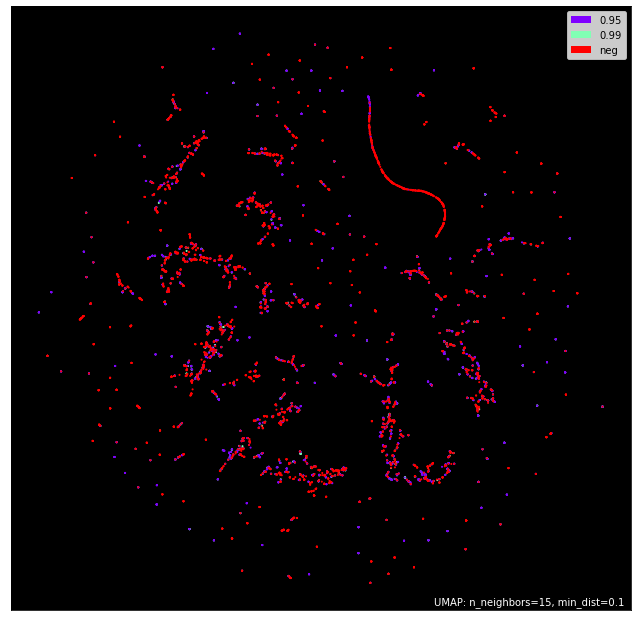

In [32]:
umap.plot.points(mapper, labels=class_labels, theme='fire')
# umap.plot.points(mapper, labels=class_labels)

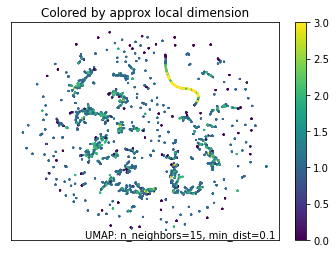

In [33]:
## Local dimensions
## Embeddings more accurate in regions where the points have consistently lower local dimension.
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

<AxesSubplot:title={'center':'Colored by RGB coords of PCA embedding'}>

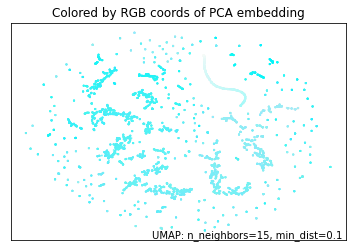

In [34]:
## PCA
umap.plot.diagnostic(mapper, diagnostic_type='pca') ##  looking for here is a generally smooth transition of colors

In [35]:
# umap.plot.diagnostic(mapper, diagnostic_type = 'vq')

In [36]:
# umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')

In [37]:
# import seaborn as sns

In [38]:
## To dataframe ??
# to_df = pd.DataFrame(edge_emb_arr)
# to_df['Class'] = class_labels
# to_df

In [39]:
# sns.pairplot(to_df, hue='Class')

# Reference codes

### Train/Test Dataframe

In [40]:
# import pandas as pd

In [41]:
# ## Experimentally verified test
# expt = pd.read_csv('edges/Experimentally_Verified_Test/testset_1.csv')
# expt['Class'] = ''
# expt.loc[expt['label'] == 1, 'Class'] = 'test_pos'
# expt.loc[expt['label'] == 0, 'Class'] = 'test_neg'
# expt = expt.drop(columns=['label'])
# expt

In [42]:
# edge_emb_f = pd.read_csv('train_test_dataset.csv') 

# edge_emb_ff = edge_emb_f[(edge_emb_f['Class'] == 'train_pos') | (edge_emb_f['Class'] == 'train_neg')]
# edge_emb_ff = pd.concat([edge_emb_ff, expt], ignore_index=True)

In [43]:
# edge_emb_ff['Class'].value_counts()

In [44]:
# ## TRAIN
# pos = pd.read_csv('edges/Sept_2022_new/balanced/idx/b_pos_idx.csv')
# pos['Class'] = 'train_pos'

# neg = pd.read_csv('edges/Sept_2022_new/balanced/idx/b_neg_idx.csv')
# neg['Class'] = 'train_neg'


# ## TEST
# test = pd.read_csv('edges/Sept_2022_new/balanced/idx/b_test_idx.csv')

# test_pos = test[test['label'] == 1]
# test_pos['Class'] = 'test_pos'

# test_neg = test[test['label'] == 0]
# test_neg['Class'] = 'test_neg'

# df = pd.concat([pos, neg, test_pos, test_neg], ignore_index=True)
# df = df.drop(columns=['label'])

# # df.to_csv('train_test_dataset.csv', index=False)

In [45]:
# ## Plot
# plt.rcParams["figure.figsize"] = (12, 8)

# fig, axs = plt.subplots(2, 4)
# plt.setp(axs, xticks=[1, 3, 5, 7, 9], xticklabels=['2', '4', '6', '8', '10']) ## xticks starts from 0 (i.e. xticklabels 1)

# locs, labels = plt.xticks()  # Get the current locations and labels.
# print(locs, labels)

# axs[0, 0].plot(acc)
# axs[0, 0].set(ylabel='accuracy')

# axs[0, 1].plot(sen, 'tab:orange')
# axs[0, 1].set(ylabel='sensitivity(recall)')

# axs[0, 2].plot(spec, 'tab:green')
# axs[0, 2].set(ylabel='specificity')

# axs[0, 3].plot(pre, 'tab:red')
# axs[0, 3].set(ylabel='precision')

# axs[1, 0].plot(f1, 'tab:purple')
# axs[1, 0].set(ylabel='F1-Score')

# axs[1, 1].plot(roc, 'tab:brown')
# axs[1, 1].set(ylabel='ROC-AUC')

# axs[1, 2].plot(pr, 'tab:pink')
# axs[1, 2].set(ylabel='PR-AUC')

# ## To-do: axs[1,3] how to hide??
# fig.delaxes(axs[1,3])

# fig.tight_layout()

# plt.savefig('./eval_metrics_plts/' + mtd + '.png')
# print('---Plot Saved---')

In [46]:
# len(pendigits.feature_names) ## dimensions

In [47]:
# pendigits.data.shape

In [48]:
# len(pendigits.target)

In [49]:
# pendigits = sklearn.datasets.load_digits()
# pendigits

In [50]:
# mapper = umap.UMAP().fit(pendigits.data)

In [51]:
# umap.plot.points(mapper)

In [52]:
# umap.plot.points(mapper, labels=pendigits.target)